# Personal Loan Prediction Project

<b><i>Context :</i></b>

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.






<b><i>Content:</i></b>

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.






<b><i>Problem:</i></b>

•	To predict wether a liability customer will buy a personal loan or not.

•	To predict which segment of customer should be targeted more.






<b><i>Dataset:</i></b>

•	ID: Customer ID

•	Age: Customer’s age in completed years

•	Experience: #years of professional experience

•	Income: Annual income of the customer (in thousand dollars)

•	ZIP Code: Home Address ZIP code

•	Family: the Family size of the customer

•	CCAvg: Average spending on credit cards per month (in thousand dollars)

•	Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

•	Mortgage: Value of house mortgage if any. (in thousand dollars)

•	Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

•	Securities_Account: Does the customer have securities account with the bank?

•	CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

•	Online: Do customers use internet banking facilities?

•	CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?




# Libararies


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import scipy.stats as stats 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



In [57]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [58]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Dataframe analysis

In [59]:
df.shape

(5000, 14)

So, there are 5000 rows and 14 columns in ur dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [61]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [62]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

So, it seems like we have no null values in our dataset . So no need to worry about null values. 

In [63]:
df.lt(0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

Here we can see that in experience we have some negavtive values . So we need to work on it.

In [64]:
df.loc[df['Experience']<0,'Experience']=0

In [65]:
df.lt(0).any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

So now there are no negative values

ID and ZIP Code are nt required for prediction so we will drop them 

In [66]:
df.drop(['ID','ZIP Code'], axis=1,inplace=True)

In [67]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Data Visualization

In [68]:
categorical=[col for col in df.columns if df[col].nunique()<=5]
continous=[col for col in df.columns if df[col].nunique()>5]
print("Categorical columns : ", categorical)
print("Continous columns : ", continous)

Categorical columns :  ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Continous columns :  ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [69]:
categorical.remove("Personal Loan")
print(categorical)
print(continous)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


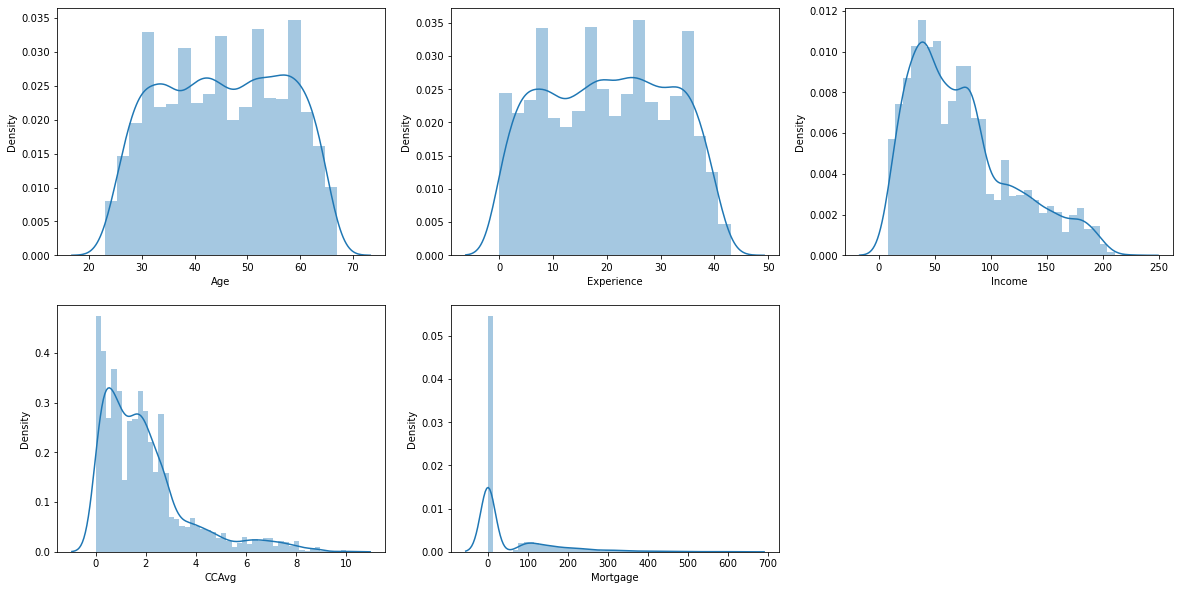

In [70]:
fig=plt.figure(figsize=(20,10))
for i, col in enumerate(continous):
    ax=fig.add_subplot(2,3,i+1)
    sb.distplot(df[col])

In the above distplot of categorical data, we can see that Experience and age are uniformally distributed.

and Mortgage has maximum value as 0

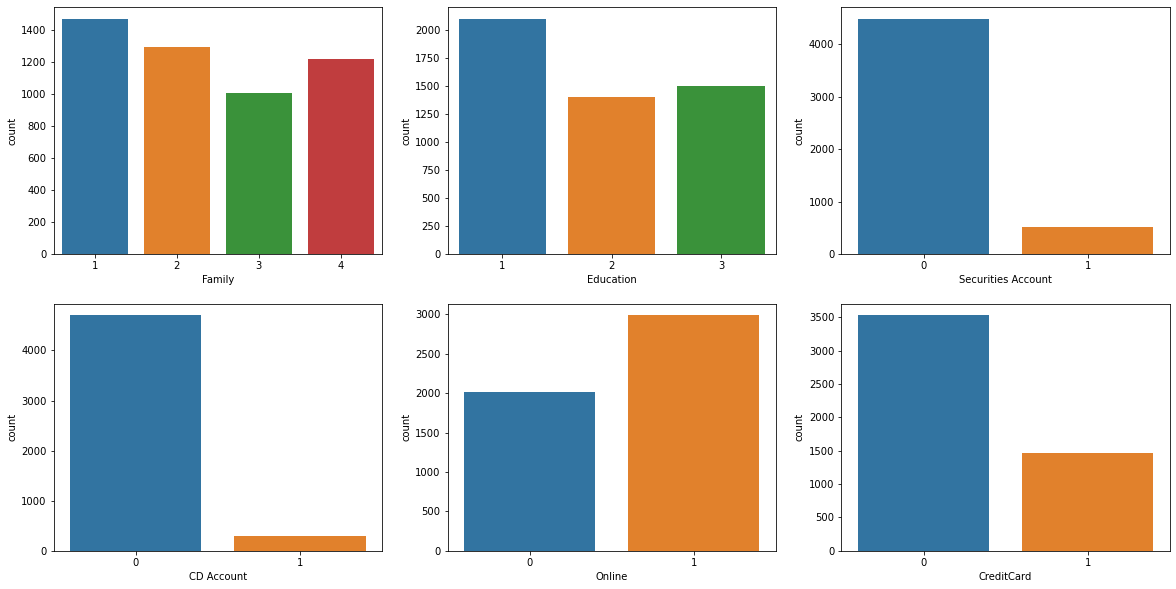

In [71]:
fig=plt.figure(figsize=(20,10))
for i, col in enumerate(categorical):
    ax=fig.add_subplot(2,3,i+1)
    sb.countplot(df[col])

Here from the countplot we see that 

Most of the people are undergraduate

Most of the people don't have securities account

Most people does not have CD account

Most people use Internet banking

Most people does not have credit card

# Data cleaning


(12.5, -0.5)

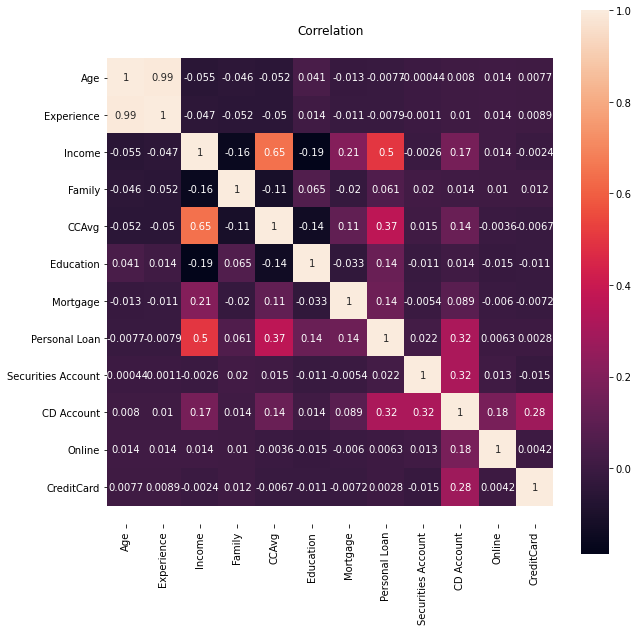

In [72]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
ax=sb.heatmap(corr, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We will drop Experience column

In [73]:
df.drop('Experience',axis=1,inplace=True)

In [74]:
df['Extra_serv']=df['Online']+df['CreditCard']

In [75]:
df[['Extra_serv','Online','CreditCard','Personal Loan']].corr()

,Extra_serv,Online,CreditCard,Personal Loan
Extra_serv,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


In [76]:
df.drop(['Online','CreditCard'],axis=1,inplace=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Extra_serv
0,25,49,4,1.6,1,0,0,1,0,0
1,45,34,3,1.5,1,0,0,1,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


# Train test split

In [77]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
4966,41,34,1,0.7,1,143,0,0,0
4086,50,11,4,0.2,1,0,1,0,0
2881,49,55,4,0.1,3,0,0,0,1
1237,38,169,1,6.8,3,0,0,1,2
1429,31,35,1,0.6,3,171,0,0,0


# Scaling

In [80]:
scaler=StandardScaler()

In [81]:
X_train[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']]=scaler.fit_transform(X_train[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']])
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
4966,-0.385787,-0.860819,-1.238309,-0.703098,-1.051445,0.876406,0,0,-1.34429
4086,0.403579,-1.363244,1.381527,-0.989435,-1.051445,-0.558751,1,0,-1.34429
2881,0.315871,-0.402083,1.381527,-1.046702,1.329698,-0.558751,0,0,0.14511
1237,-0.648908,2.088196,-1.238309,2.790212,1.329698,-0.558751,0,1,1.63451
1429,-1.262859,-0.838975,-1.238309,-0.760365,1.329698,1.157416,0,0,-1.34429


In [82]:
X_test[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']]=scaler.fit_transform(X_test[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']])
X_test.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
789,-1.396303,-0.936338,1.436208,-0.949415,0.147721,-0.549411,0,0,0.204340
2507,1.189762,-0.314001,1.436208,0.079006,-1.043579,1.651143,0,0,1.699507
2376,1.103560,-1.108017,0.567884,-1.006549,-1.043579,-0.549411,0,0,-1.290828
1378,0.758751,-0.871958,1.436208,-1.063683,1.339022,-0.549411,0,0,0.204340
598,0.931156,-1.365536,-0.300440,-1.006549,1.339022,0.296956,0,0,-1.290828


# Decision Tree Classifier

In [83]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [85]:
tree_score=f1_score(y_test,y_test_pred)
tree_score

0.9102564102564102

In [86]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[3178,    0],
       [   0,  322]], dtype=int64)

In [87]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9813333333333333


array([[1330,   12],
       [  16,  142]], dtype=int64)

In [88]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.92      0.90      0.91       158

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# Thank you